# Case study: heart failures

In [13]:
import pandas, seaborn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import chi2, f_classif

def evaluate(model, X, y, random_state=2021, scoring=['accuracy','precision','recall']):
    cv = ShuffleSplit(n_splits=20, random_state=random_state)
    result = cross_validate(
        model, 
        X, 
        y, 
        cv=cv, 
        scoring=scoring)
    print(model)
    for s in scoring:
        print('\t', s, result['test_' + s].mean().round(2))
        
        
rf = RandomForestClassifier(n_estimators=20, max_depth=5)

df = pandas.read_csv('../../Datasets/HeartFailures/heart_failures.csv')

X = df.drop(columns=['DEATH_EVENT'])

y = df['DEATH_EVENT']

+ What models should we use?
+ What are the most important features?
    + dependency (chi2)
    + variance (f_classif)
    + using model (rf)
+ Remember to scale data for PCA
+ Explained variance (PCA)
+ Non-negative feature extraction (NMF)



In [2]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [9]:
sorted(zip(rf.feature_importances_, X.columns))

[(0.004663694594399012, 'diabetes'),
 (0.004943012858986644, 'smoking'),
 (0.0077525519118066865, 'high_blood_pressure'),
 (0.007876583799506186, 'anaemia'),
 (0.012279139396693561, 'sex'),
 (0.052601679813985336, 'platelets'),
 (0.059969655138545096, 'serum_sodium'),
 (0.06345666317988971, 'creatinine_phosphokinase'),
 (0.10598212390336792, 'age'),
 (0.11742440993971273, 'ejection_fraction'),
 (0.17788685166286922, 'serum_creatinine'),
 (0.38516363380023794, 'time')]

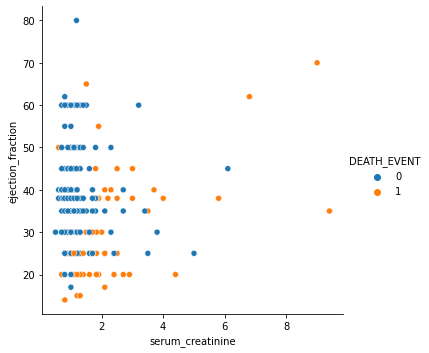

In [10]:
seaborn.relplot(data=df, x='serum_creatinine', y='ejection_fraction', hue='DEATH_EVENT')

In [11]:
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X1)

scaler2 = MinMaxScaler()
X2 = scaler2.fit_transform(X)
nmf = NMF()
X_nmf = nmf.fit_transform(X2)

/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [14]:
evaluate(rf, X, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.84
	 precision 0.8
	 recall 0.68


In [15]:
y.value_counts(1)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

In [16]:
evaluate(rf, X1, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.84
	 precision 0.81
	 recall 0.68


In [17]:
evaluate(rf, X2, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.83
	 precision 0.77
	 recall 0.67


In [21]:
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

df['nmf1'] = X_nmf[:, 0]
df['nmf2'] = X_nmf[:, 1]


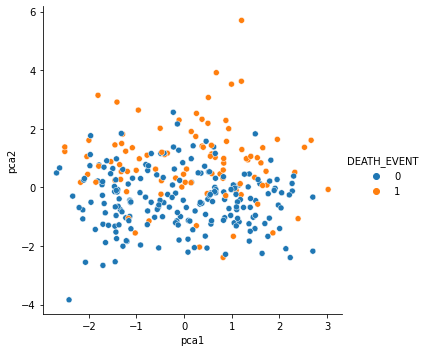

In [22]:
seaborn.relplot(data=df, x='pca1', y='pca2', hue='DEATH_EVENT')

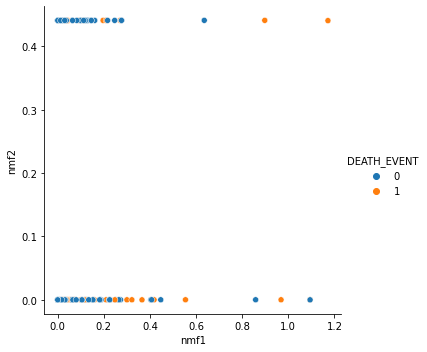

In [23]:
seaborn.relplot(data=df, x='nmf1', y='nmf2', hue='DEATH_EVENT')

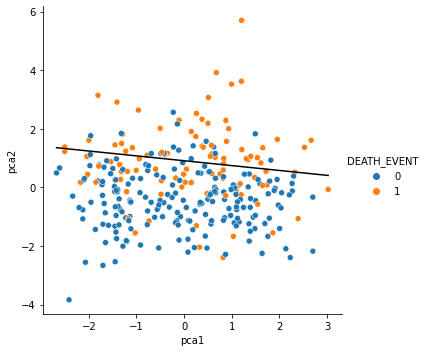

In [26]:
from interpret_models import show_boundary

svm = LinearSVC(dual=False)
show_boundary(svm, df[['pca1','pca2']], y, 'pca1', 'pca2')

In [27]:
pca.fit(X1,y)

PCA()

In [29]:
pca.explained_variance_ratio_.round(3)

array([0.139, 0.132, 0.106, 0.093, 0.086, 0.082, 0.074, 0.07 , 0.064,
       0.059, 0.054, 0.043])

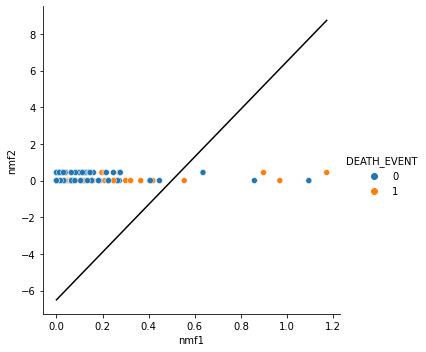

In [30]:
show_boundary(svm, df[['nmf1','nmf2']], y, 'nmf1', 'nmf2')

#### How good can 2 features be?

In [33]:
X = df[['serum_creatinine','ejection_fraction']]

scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)

scaler2 = MinMaxScaler()
X2 = scaler2.fit_transform(X)
nmf = NMF(n_components=2)
X_nmf = nmf.fit_transform(X2)

/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/vphan/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [32]:
evaluate(rf, X, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.77
	 precision 0.7
	 recall 0.5


With all features, we got:

```
RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.84
	 precision 0.8
	 recall 0.68
```

In [34]:
evaluate(rf, X_pca, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.78
	 precision 0.68
	 recall 0.59


In [35]:
evaluate(rf, X_nmf, y)

RandomForestClassifier(max_depth=5, n_estimators=20)
	 accuracy 0.78
	 precision 0.74
	 recall 0.51


The article claimed these two features serum_creatinine and ejection_fraction, alone could predict heart failures.

We found that prediction performance was lower than if we were to use all features.

Using the best two new features (produced by either PCA or NMF) resulted in higher performance than with serum_creatinine and ejection_fraction.